In [1]:
import pandas as pd
import os
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
import os

warnings.filterwarnings("ignore")

df = pd.read_csv(r"csv/akakce.csv")

df["Price"] = df["Price"].apply(
    lambda x: int(str(x).replace(" TL", "").split(",")[0].replace(".", ""))
)
df["Price"] = df["Price"].astype(int)

df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y", errors="coerce")

df = df.sort_values(["Product Name", "Date"])
df = df.drop_duplicates(subset=["Product Name", "Date"]).reset_index(drop=True)

product_names = df["Product Name"].unique()

output_dir = "predictions"
os.makedirs(output_dir, exist_ok=True)

for product in product_names:
    product_df = df[df["Product Name"] == product].sort_values("Date")

    if len(product_df) < 10:
        print(f"Insufficient data: {product} (atlandı)")
        continue

    try:
        model = ARIMA(product_df["Price"], order=(3, 1, 1))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=5)

        plt.figure(figsize=(10, 5))
        plt.plot(product_df["Date"], product_df["Price"], label="Real price")
        future_dates = pd.date_range(
            start=product_df["Date"].iloc[-1], periods=6, freq="D"
        )[1:]
        plt.plot(future_dates, forecast, label="Estimation", color="red", marker="o")
        plt.title(f"{product} - Price Prediction for 5 days")
        plt.xlabel("Tarih")
        plt.ylabel("Fiyat (TL)")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        filename = f"{output_dir}/{product.replace(' ', '_')}_forecast.png"
        plt.savefig(filename)
        plt.close()
        print(f"Estimation graph was saved: {filename}")

    except Exception as e:
        print(f"An error occurred ({product}): {e}")

FileNotFoundError: [Errno 2] No such file or directory: 'csv/akakce.csv'

Estimation price: 7125.00 TL


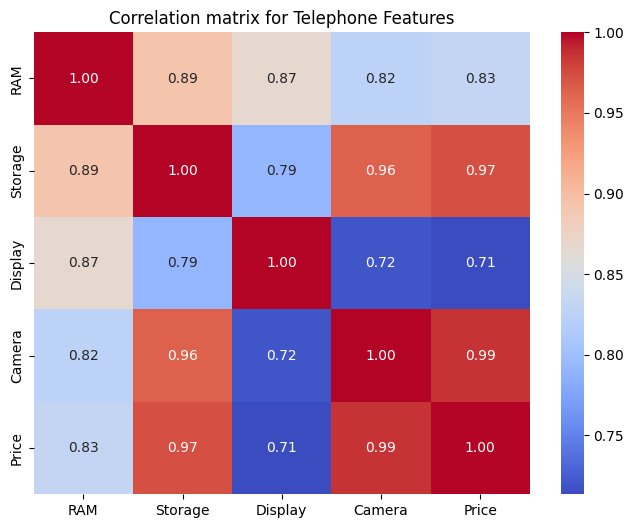

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

data = pd.DataFrame({
    'RAM':       [2, 4, 6, 8, 12, 4, 6, 8, 12, 16, 3, 6, 8, 8, 4, 6, 10, 12, 6, 8],
    'Storage':  [32, 64, 128, 128, 256, 64, 128, 128, 256, 512, 64, 128, 128, 256, 64, 128, 256, 512, 128, 256],
    'Display':     [5.0, 5.5, 6.1, 6.3, 6.7, 5.8, 6.0, 6.4, 6.5, 6.8, 5.2, 6.2, 6.3, 6.6, 5.5, 6.1, 6.6, 6.9, 6.3, 6.7],
    'Camera':    [8, 12, 16, 48, 64, 13, 20, 32, 64, 200, 5, 24, 48, 108, 12, 16, 64, 200, 50, 64],
    'Price':     [3000, 4500, 7000, 10000, 14000, 5000, 7500, 9000, 13000, 40000, 2500, 6800, 9800, 17000, 4900, 7200, 12000, 39000, 8500, 16000]
})

X = data[['RAM', 'Storage', 'Display', 'Camera']]
y = data['Price']

model = KNeighborsRegressor(n_neighbors=4)
model.fit(X, y)

new_phone = pd.DataFrame({
    'RAM': [1],
    'Storage': [190],
    'Display': [5.2],
    'Camera': [2]
})

prediction = model.predict(new_phone)
print(f"Estimation price: {prediction[0]:.2f} TL")
corr = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix for Telephone Features")
plt.show()


0        Apple iPhone 16 Pro
1        Apple iPhone 16 Pro
2        Apple iPhone 16 Pro
3    Apple iPhone 16 Pro Max
4       Apple iPhone 12 mini
5       Apple iPhone 12 mini
6       Apple iPhone 13 mini
7       Apple iPhone 13 mini
8            Apple iPhone XR
9            Apple iPhone XR
Name: phone_model, dtype: object
Estimation price: 1169.11 USD


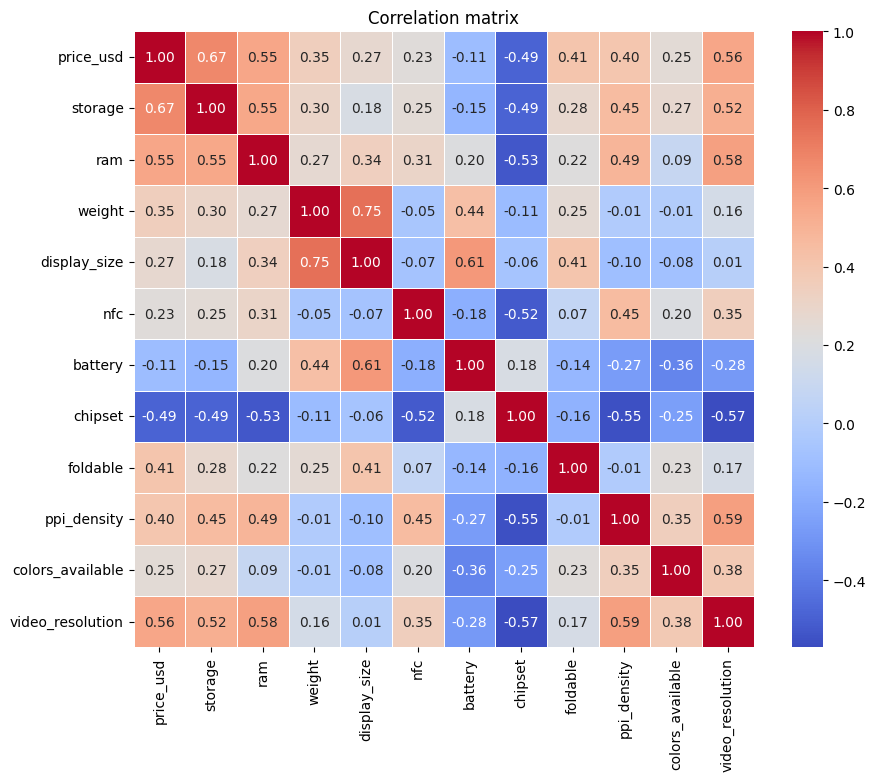

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"csv/phones.csv")

X = df[["ram", "storage", "display_size", "weight"]]
y = df["price_usd"]

print(df["phone_model"].head(10))

df["phone_model"].to_csv(r"csv/phoneNames.csv", index=False)
df["chipset"] = df["chipset"].apply(
    lambda x: int(
        ''.join(filter(str.isdigit, x.split("(")[-1].split("nm")[0]))
    ) if isinstance(x, str) and "(" in x and "nm" in x else 0
)
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X, y)

new_phone = pd.DataFrame(
    [{"ram": 700, "storage": 1024, "display_size": 6.2, "weight": 199.0}]
)

prediction = model.predict(new_phone)
print(f"Estimation price: {prediction[0]:.2f} USD")


numeric_df = df.select_dtypes(include=[float, int])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation matrix")
plt.show()